This is Air Passengers data from https://www.kaggle.com/rakannimer/air-passengers/. It has two column: Date and number of passengers in that month. The data is from 1949 January to 1960 December

Importing All the libraries required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

Reading the data as pandas dataframe into variable:df and then exporting it as numpy 1 Dimensional Array in variable: data

In [2]:
df = pd.read_csv('./data/data.csv')
data = df['passangers'].values

Plotting the data and Displaying number of Rows and Column in data

(144,)


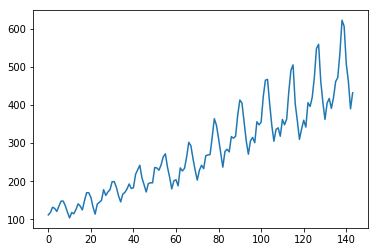

In [3]:
print(data.shape)
n = data.size
plt.plot(data)
plt.show()

Defining an autocorrelation function that takes sequence and lag as input and calculate autocorrelation

In [4]:
def autocorr(x, t=1):
    return np.corrcoef(np.array([x[:-t], x[t:]]))

Plotting the autocorrelation for various lag

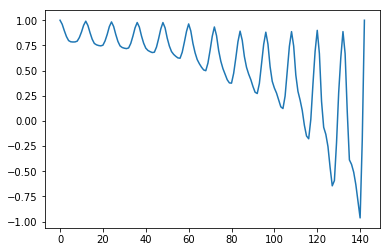

In [5]:
acor = np.zeros((data.size,1))
acor[0]=1
for i in range(1,data.size):
    temp = autocorr(data,i)
    acor[i]=temp[0][1]

plt.plot(acor)
plt.show()

Dividing data in training and testing set


In [6]:
test_data_size = 44
train_data = data[:-test_data_size].copy()

Making dataset for training

In [25]:
p = 20
reg_data = np.zeros(((train_data.size-p),(p+1)))
reg_data[:,0] = train_data[p:]

for i in range(1,p+1):
    reg_data[:,i] = train_data[p-i:-i]


Fit the dataset in linear Regression model

In [26]:
reg = linear_model.LinearRegression()
reg.fit(reg_data[:,1:],reg_data[:,0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Prediction of data and compare with the original one

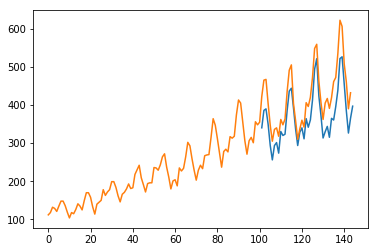

In [28]:
predicted = np.zeros((test_data_size,1))

for i in range(test_data_size):
    temp = data.size-test_data_size-1+i
    predicted[i]=reg.predict(data[(temp-p-1):(temp-1)].reshape(1,-1))

plt.plot(range(data.size-test_data_size+1,data.size+1),predicted)
plt.plot(data)
plt.show()